In [6]:
import itertools as it
import matplotlib.pyplot as plt
load("utils.sage")

In [7]:
x,y = var("x,y")

In [8]:
R.<r,p> = QQ[]
F = R.fraction_field()

### Cycle absorption

In [60]:
%%time 
N = 6
Pmor = matrix(F, [[0]* (N+1)] * (N+1))
Pbin = matrix(F, [[0]* (N+1)] * (N+1))
Pber = matrix(F, [[0]* (N+1)] * (N+1))

Pmor[:] = 0

Pmor[0,0] = Pbin[0,0] = Pber[0,0] = 1
Pmor[N,N] = Pbin[N,N] = Pber[N,N] = 1


Pmor[1,0] = 2 / (N-1 + r) * 1/2
Pmor[1,2] = r / (N-1 + r)
Pmor[1,1] = 1 - sum(Pmor.row(1))

Pber[1,0] = 2 / (N-1 + r) * 1/2
Pber[1,3] = r / (N-1 + r) * p
Pber[1,1] = 1 - sum(Pber.row(1))

Pbin[1,0] = 1 / (N-1 + r)
Pbin[1,2] = r / (N-1 + r) * 2 * p * (1-p)
Pbin[1,3] = r / (N-1 + r) * p**2
Pbin[1,1] = 1 - sum(Pbin.row(1))

for i in range(2,N):
    Pmor[i,i-1] = 1 / (N-i + r*i) 
    Pmor[i,i+1] = r / (N-i + r*i)
    Pmor[i,i] = 1 - sum(Pmor.row(i))
    
    Pber[i,i-1] = 1 / (N-i + r*i)
    Pber[i,i+1] = 2 * r / (N-i + r*i) * p
    Pber[i,i] = 1 - sum(Pber.row(i))

    Pbin[i,i-1] = 1 / (N-i + r*i) 
    Pbin[i,i+1] = 2 * r / (N-i + r*i) * p
        
    Pbin[i,i] = 1 - sum(Pbin.row(i))

# Simplifications... I have not managed to do it in a reasonable way.. 
Pmor = Pmor.change_ring(SR).change_ring(F)
Pber = Pber.change_ring(SR).change_ring(F)
Pbin = Pbin.change_ring(SR).change_ring(F)

Qmor = identity_matrix(N-1) - Pmor[1:-1,1:-1]
Qbin = identity_matrix(N-1) - Pbin[1:-1,1:-1]
Qber = identity_matrix(N-1) - Pber[1:-1,1:-1]

Phimor = Qmor.solve_right(vector(Pmor[1:-1,-1]))
Phibin = Qbin.solve_right(vector(Pbin[1:-1,-1]))
Phiber = Qber.solve_right(vector(Pber[1:-1,-1]))

# Simplifications... I have not managed to do it in a reasonable way
Phimor = Phimor.change_ring(SR).change_ring(F)
Phibin = Phibin.change_ring(SR).change_ring(F)
Phiber = Phiber.change_ring(SR).change_ring(F)

TimeBin = Qbin.solve_right(vector([1]*(N-1)))
TimeBin = TimeBin.change_ring(SR).change_ring(F)

TimeBer = Qber.solve_right(vector([1]*(N-1)))
TimeBer = TimeBer.change_ring(SR).change_ring(F)

TimeMor = Qmor.solve_right(vector([1]*(N-1)))
TimeMor = TimeMor.change_ring(SR).change_ring(F)

# Conditionated times
PmorF = copy(Pmor)
PberF = copy(Pber)
PbinF = copy(Pbin)

for i in range(1,N):
    PmorF.rescale_col(i, Phimor[i-1])
    PmorF.rescale_row(i, 1/Phimor[i-1])
    
    PberF.rescale_col(i, Phiber[i-1])
    PberF.rescale_row(i, 1/Phiber[i-1])
    
    PbinF.rescale_col(i, Phibin[i-1])
    PbinF.rescale_row(i, 1/Phibin[i-1])

QmorF = identity_matrix(N-1) - PmorF[1:-1,1:-1]
QbinF = identity_matrix(N-1) - PbinF[1:-1,1:-1]
QberF = identity_matrix(N-1) - PberF[1:-1,1:-1]
    
TimeBinF = QbinF.solve_right(vector([1]*(N-1)))
TimeBinF = TimeBinF.change_ring(SR).change_ring(F)

TimeBerF = QberF.solve_right(vector([1]*(N-1)))
TimeBerF = TimeBerF.change_ring(SR).change_ring(F)

TimeMorF = QmorF.solve_right(vector([1]*(N-1)))
TimeMorF = TimeMorF.change_ring(SR).change_ring(F)

TimeMorNF = ((TimeMor - Phimor[0] * TimeMorF) / (1 - Phimor[0])).change_ring(SR).change_ring(F)
TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

CPU times: user 189 ms, sys: 77 μs, total: 189 ms
Wall time: 189 ms


In [14]:
maxr = 2
plot3d(log(TimeBinF[0]), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(TimeMorF[0]), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(TimeBerF[0]), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(TimeBinF[0])(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(TimeBerF[0])(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [15]:
plot3d(log(TimeBinNF[0]), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(TimeMorNF[0]), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(TimeBerNF[0]), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(TimeBinNF[0])(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(TimeBerNF[0])(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [16]:
plot3d(log(TimeBin[0]), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(TimeMor[0]), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(TimeBer[0]), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(TimeBin[0])(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(TimeBer[0])(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [13]:
rs = [0,1/10+1/80..2/10]
rs.extend([2/10,2/10+1/40..1][1:-1])
rs.extend([1,1+1/10..10])
pcsbin = []
pcsber = []
tmpbin = (Phibin[0] - Phimor[0])
tmpber = (Phiber[0] - Phimor[0])
for valr in rs:
    if valr == 0:
        pcsbin.append(0)
        pcsber.append(0)
    else:
        pcsbin.append(pc(tmpbin.numerator().subs(r=valr)))
        pcsber.append(pc(tmpber.numerator().subs(r=valr)))
    

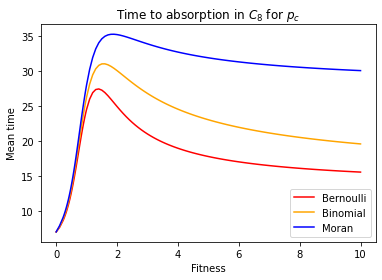

In [28]:
plt.plot(rs, [TimeBer[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBin[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMor[0](r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to absorption in $C_{N}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"c{N}_absorption.pdf")

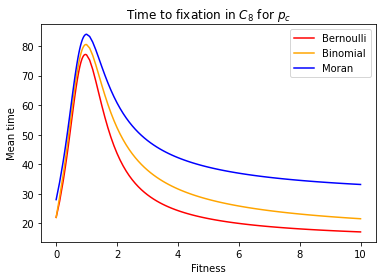

In [29]:
plt.plot(rs, [TimeBerF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBinF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMorF[0](r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to fixation in $C_{N}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"c{N}_fixation.pdf")

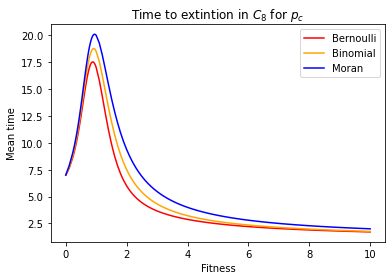

In [30]:
plt.plot(rs, [TimeBerNF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBinNF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMorNF[0](r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to extintion in $C_{N}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"c{N}_extintion.pdf")

### Near 1

In [85]:
%%time 
N = 12
Pmor = matrix(F, [[0]* (N+1)] * (N+1))
Pbin = matrix(F, [[0]* (N+1)] * (N+1))
Pber = matrix(F, [[0]* (N+1)] * (N+1))

Pmor[:] = 0

Pmor[0,0] = Pbin[0,0] = Pber[0,0] = 1
Pmor[N,N] = Pbin[N,N] = Pber[N,N] = 1


Pmor[1,0] = 2 / (N-1 + r) * 1/2
Pmor[1,2] = r / (N-1 + r)
Pmor[1,1] = 1 - sum(Pmor.row(1))

Pber[1,0] = 2 / (N-1 + r) * 1/2
Pber[1,3] = r / (N-1 + r) * p
Pber[1,1] = 1 - sum(Pber.row(1))

Pbin[1,0] = 1 / (N-1 + r)
Pbin[1,2] = r / (N-1 + r) * 2 * p * (1-p)
Pbin[1,3] = r / (N-1 + r) * p**2
Pbin[1,1] = 1 - sum(Pbin.row(1))

for i in range(2,N):
    Pmor[i,i-1] = 1 / (N-i + r*i) 
    Pmor[i,i+1] = r / (N-i + r*i)
    Pmor[i,i] = 1 - sum(Pmor.row(i))
    
    Pber[i,i-1] = 1 / (N-i + r*i)
    Pber[i,i+1] = 2 * r / (N-i + r*i) * p
    Pber[i,i] = 1 - sum(Pber.row(i))

    Pbin[i,i-1] = 1 / (N-i + r*i) 
    Pbin[i,i+1] = 2 * r / (N-i + r*i) * p
        
    Pbin[i,i] = 1 - sum(Pbin.row(i))

# Simplifications... I have not managed to do it in a reasonable way.. 
Pmor = Pmor.change_ring(SR).change_ring(F)
Pber = Pber.change_ring(SR).change_ring(F)
Pbin = Pbin.change_ring(SR).change_ring(F)

Qmor = identity_matrix(N-1) - Pmor[1:-1,1:-1]
Qbin = identity_matrix(N-1) - Pbin[1:-1,1:-1]
Qber = identity_matrix(N-1) - Pber[1:-1,1:-1]

Phimor = Qmor.solve_right(vector(Pmor[1:-1,-1]))
Phibin = Qbin.solve_right(vector(Pbin[1:-1,-1]))
Phiber = Qber.solve_right(vector(Pber[1:-1,-1]))

# Simplifications... I have not managed to do it in a reasonable way
Phimor = Phimor.change_ring(SR).change_ring(F)
Phibin = Phibin.change_ring(SR).change_ring(F)
Phiber = Phiber.change_ring(SR).change_ring(F)

TimeBin = Qbin.solve_right(vector([1]*(N-1)))
TimeBin = TimeBin.change_ring(SR).change_ring(F)

TimeBer = Qber.solve_right(vector([1]*(N-1)))
TimeBer = TimeBer.change_ring(SR).change_ring(F)

TimeMor = Qmor.solve_right(vector([1]*(N-1)))
TimeMor = TimeMor.change_ring(SR).change_ring(F)

# Conditionated times
PmorF = copy(Pmor)
PberF = copy(Pber)
PbinF = copy(Pbin)

for i in range(1,N):
    PmorF.rescale_col(i, Phimor[i-1])
    PmorF.rescale_row(i, 1/Phimor[i-1])
    
    PberF.rescale_col(i, Phiber[i-1])
    PberF.rescale_row(i, 1/Phiber[i-1])
    
    PbinF.rescale_col(i, Phibin[i-1])
    PbinF.rescale_row(i, 1/Phibin[i-1])

QmorF = identity_matrix(N-1) - PmorF[1:-1,1:-1]
QbinF = identity_matrix(N-1) - PbinF[1:-1,1:-1]
QberF = identity_matrix(N-1) - PberF[1:-1,1:-1]
    
TimeBinF = QbinF.solve_right(vector([1]*(N-1)))
TimeBinF = TimeBinF.change_ring(SR).change_ring(F)

TimeBerF = QberF.solve_right(vector([1]*(N-1)))
TimeBerF = TimeBerF.change_ring(SR).change_ring(F)

TimeMorF = QmorF.solve_right(vector([1]*(N-1)))
TimeMorF = TimeMorF.change_ring(SR).change_ring(F)

TimeMorNF = ((TimeMor - Phimor[0] * TimeMorF) / (1 - Phimor[0])).change_ring(SR).change_ring(F)
TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

CPU times: user 775 ms, sys: 3.41 ms, total: 778 ms
Wall time: 779 ms


In [86]:
rs = [95/100,95/100+1/800..105/100]
pcsbin = []
pcsber = []
tmpbin = (Phibin[0] - Phimor[0])
tmpber = (Phiber[0] - Phimor[0])
for valr in rs:
    if valr == 0:
        pcsbin.append(0)
        pcsber.append(0)
    else:
        pcsbin.append(pc(tmpbin.numerator().subs(r=valr)))
        pcsber.append(pc(tmpber.numerator().subs(r=valr)))
    

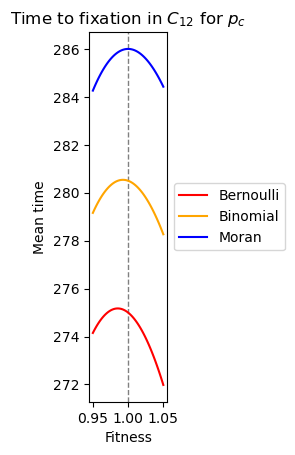

In [87]:
plt.figure().set_figwidth(1)
plt.plot(rs, [TimeBerF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBinF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMorF[0](r=valr) for valr in rs], c="blue", label="Moran")
ylim = plt.ylim()
plt.plot([1,1], ylim, '--', zorder=0, c="gray", linewidth=1)
plt.ylim(ylim)
plt.title(f"Time to fixation in $C_{{{N}}}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"c{N}_fixation_zoom.pdf", bbox_inches="tight")